<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'


In [2]:
with open(DATA_FILE) as tabfile:
    read_file = csv.reader(tabfile, delimiter="\t")
    file_nested_list = list(read_file)
file_nested_list[:5]

[['order_id', 'quantity', 'item_name', 'choice_description', 'item_price'],
 ['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '$3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 ']]

1- assigned DATA_FILE as a csv file, indicating that elements are separated with a tab.
2- converted csv file into a list of lists, with each sublist being a row of data. 

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [3]:
#Identified header and data of file_nested_list
header = file_nested_list[0]
data = file_nested_list[1:]

Separated list into header and data via element index

##### Below is extra data preparation for analysis and remaining questions

In [4]:
#data preparation for analysis 
#1. convert to dataframe, set first row as column names, then delete first row from data.
#2. remove '$' from item_price
#3. convert order_id, quantity and item_price to numeric
import pandas as pd
dl = pd.DataFrame(file_nested_list)
dl.columns = dl.iloc[0]
df = dl.drop(dl.index[0])
df['item_price'].replace({'\$':''}, inplace = True, regex=True)
df["quantity"] = df.quantity.astype(int, inplace = True)
df["order_id"] = df.order_id.astype(int, inplace = True)
df['item_price'] = df.item_price.astype(float, inplace = True)
df.dtypes


0
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

For the rest of the questions, I converted file_nested_list into a DataFrame 'dl', then performed the following cleaning steps:

1. defined the column names of 'dl' as being the first row (index 0) in the DataFrame, then removed this row and assigned 'df' to the new DataFrame
2. removed '$' sign from the item_price column, to facilitate changing of column data type
3. Converted order_id, quantity and item_price to numeric type, so that we can filter according to numeric conditions.


---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [5]:
#Check that item_price takes quantity into account
df_chips = df.loc[df['item_name'] == 'Side of Chips']
print(df_chips.loc[df_chips['order_id'] == 3])
print(df_chips.loc[df_chips['quantity'] > 1])
print(13.52/8)

0  order_id  quantity      item_name choice_description  item_price
7         3         1  Side of Chips               NULL        1.69
0     order_id  quantity      item_name choice_description  item_price
2945      1170         3  Side of Chips               NULL        5.07
3888      1559         8  Side of Chips               NULL       13.52
1.69


In the above code, we ascertain that item_prices already pre-suppose quantity. Columns with item_name 'Side of Chips' are returned with varying quantities. It is straightforward to calculate that item price takes quantity into account (13.52 / 1.69 = 8)

In [6]:
# ii. Group numerical columns by 'order_id', with corresponding 'item_price' column, 
#     containing the sum of all item_prices with same order_id value.
# iii. calculate mean 'item_price' of 'order_id's, rounded to 2 decimal places.
dp = df.groupby('order_id').sum()
#check dp has same number of rows as orders (max order_ID no. is 1834)
print(file_nested_list[-1])
dp.shape

['1834', '1', 'Chicken Salad Bowl', '[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Lettuce]]', '$8.75 ']


(1834, 2)

In [7]:
d_avg = round(dp['item_price'].mean(),2)
print('Average price of an order is $',d_avg)

Average price of an order is $ 18.81


1. Grouped numerical columns by 'order_id', with corresponding numerical columns containing the sum of all values with the same order_id number. This will give us the total item_price for each order.


2. As the dataset now contains the same number of rows as orders, we then calculate the mean on 'item_price', rounded to 2 decimal places. This gives us average item_price per order.

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [8]:
d_sodas = df[(df.item_name == 'Canned Soft Drink')|(df.item_name == 'Canned Soda')]
unique_sodas = set(d_sodas['choice_description'])
print(list(unique_sodas))

['[Coke]', '[Diet Coke]', '[Coca Cola]', '[Mountain Dew]', '[Sprite]', '[Dr. Pepper]', '[Nestea]', '[Lemonade]', '[Diet Dr. Pepper]']


1. Filter df to only include rows where item_name matches 'Canned Soft Drink' or 'Canned Soda'. This filter is assigned to 'dz'


2. Create a set containing only elements in 'choice_description' of resulting filter. Creating as a set removes duplicates, leaving us with a list of all soft drinks that Chipotle sells.

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [9]:
df_burrito = df[df['item_name'].str.contains("Burrito")]
topping_list = df_burrito.choice_description.tolist()
toppings_per_burrito = []
#split each value in topping_list by ',', with each segment becoming an element in another list. 
#The length of each new list is the number of toppings on each burrito
#As this is all we need, we then stored the length of each list in no_of_toppings
for i in topping_list:
    toppings_per_burrito.append(len(i.split(",")))
    #no. of toppings is discrete, so we make it an integer before averaging all list elements
average_toppings = int(sum(toppings_per_burrito)/len(toppings_per_burrito))
print('Average number of toppings per burrito is', average_toppings)

Average number of toppings per burrito is 5


1. filter df to only include rows with item_name containing 'burrito'. This accounts for burrito variations.


2. convert the choice_description column into a standalone list 'topping_list', splitting elements by ',' due to so elements being stored in sublists within the choice_desciption column. We then create another empty list 'toppings_per_burrito' to store topping counts.


3. 'topping_list' is a list of lists (sublists). Each element within a sublist contains a topping (string), therefore the length of each sublist is the number of toppings on an individual burrito. We loop through each element and append the length of each sublist to toppings_per_burrito list. 


4. To get the average number of toppings per burrito, we divide the sum of all elements in toppings_per_burrito (total number of toppings across all burritos) by the length of toppings_per_burrito (number of burritos).

> Note: As the number of toppings is discrete, we convert the average into an integer, which rounds it down. We can miss out this step for the true average.

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

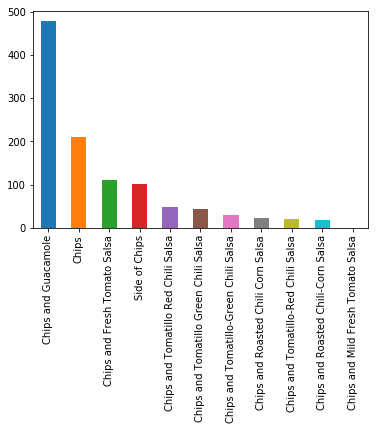

In [10]:
import matplotlib as plt
%matplotlib inline

d_chipstest= df.loc[df['item_name'].str.contains('Chips')]
bar_chip = d_chipstest['item_name'].value_counts()
bar_chip.plot.bar(x = 'item_name')

A quick check of value counts of all chip orders shows that some like-orders are counted seperately due to hyphens, likely due to errors in initial item entry in system setup. Logically, we can assume that the same item was ordered. In order to get the true number of orders of each chip order, we must make all like-orders uniform by removing hyphens. 

In [11]:
import numpy as np

df['item_name'].replace({'-':' '}, inplace=True, regex=True)
dchips = df[df['item_name'].str.contains("Chip")]

#Remove'-' in item_name to avoid duplicates when pivoted
pivot_chips = pd.pivot_table(dchips, values='quantity', index=['item_name'], aggfunc=np.sum)

#reset pivot table index to gain access to item_name column
reset_chips = pivot_chips.reset_index()
dict_chips = dict(zip(reset_chips.item_name,reset_chips.quantity))
print(dict_chips)

{'Chips': 230, 'Chips and Fresh Tomato Salsa': 130, 'Chips and Guacamole': 506, 'Chips and Mild Fresh Tomato Salsa': 1, 'Chips and Roasted Chili Corn Salsa': 41, 'Chips and Tomatillo Green Chili Salsa': 78, 'Chips and Tomatillo Red Chili Salsa': 75, 'Side of Chips': 110}


1. As per above, remove hyphens in 'item-name' column.
2. filter 'df' for all rows with 'item_name' containing 'Chips'. This gives us all Chip orders.
3. Create a pivot table that shows all unique values of 'item-name ' (in this case, strings containing chip orders), grouped by total of values in the quantity column. This gives us the total number of orders for each chip order. 
4. We then reset the index levels of the pivot table, so that we can gain access to the item_name column.
5. Create a dictionary from the reset pivot table, with 'item_name' column values as keys and those in 'quantity' as values. We use zip() to match same-row values from 'item_name' and 'quantity' columns as keys and values.

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


### Problem - find number of orders for any given item 

In [12]:
import numpy as np
def get_orders(food):
    food_low = food.lower()
    df['item_name'] = df['item_name'].str.lower()
    df['item_name'].replace({'-':' '}, inplace=True, regex=True)
    d_order = df[df['item_name'].str.contains(food_low)]
    #Remove'-' in item_name to avoid duplicates when pivoted
    pivot_orders = pd.pivot_table(d_order, values='quantity', index=['item_name'], aggfunc=np.sum)
    #reset pivot table index to gain access to item_name column
    reset_pivot = pivot_orders.reset_index()
    print(reset_pivot)
    
get_orders('salad')

0            item_name  quantity
0  barbacoa salad bowl        10
1       carnitas salad         1
2  carnitas salad bowl         6
3        chicken salad         9
4   chicken salad bowl       123
5                salad         2
6          steak salad         4
7     steak salad bowl        31
8         veggie salad         6
9    veggie salad bowl        18


1. Similar to problem 6, though the code has been re-worked into a function that takes any string and returns counts of all orders containing that string.
2. In this case, the pivot table itself is sufficient to display findings. The function is case-insensitive, as the initial argument is converted to lower case and compared to all lower-case 'item_name' values.

### Problem - What is our top-grossing item?

In [13]:
pivot_items = pd.pivot_table(df, values='item_price', index=['item_name'], aggfunc=np.sum)
reset_items = pivot_items.reset_index()
top_grossers = reset_items.iloc[reset_items['item_price'].idxmax()]
print('Chipotle\'s top-grossing item is the', top_grossers['item_name'])

Chipotle's top-grossing item is the chicken bowl


1. Finding the top selling item involves pivoting df by item name, with summed item prices for each unique item_name. We've already removed hyphens in Problem 6 with 'inplace = True', so we need not repeat that step here.


2. As before, we reset the index to gain access to item-names. We then find the row (or rows, as may be the case) that contain the highest total value in item_price. This is our top-grossing item.


3. We then print the item name in our top-grossing row in a statement of findings.